# **Import Data**

### *Import Library*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### *Import Data Mentah*

In [2]:
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Cleaning**

### *Menghapus Kolom yang Tidak Perlu*

In [3]:
df.drop(columns=["Id"], inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### *Missing Value*

In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### *Data Duplicate*

In [5]:
df.duplicated().sum()

3

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.Species.value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

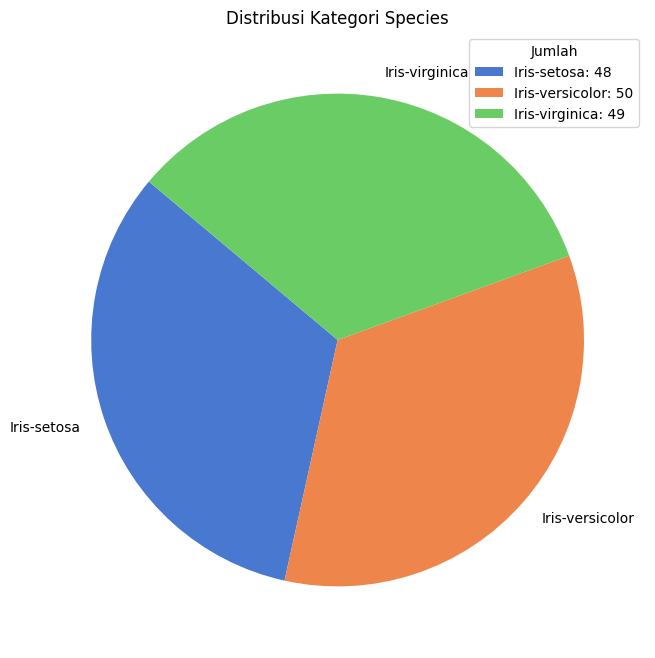

In [13]:
species_counts = df["Species"].value_counts(sort=False)

plt.figure(figsize=(8, 8))
colors = sns.color_palette("muted")
plt.pie(species_counts, labels=species_counts.index, colors=colors, startangle=140)

plt.legend(labels=[f"{label}: {count}" for label, count in zip(species_counts.index, species_counts.values)], title="Jumlah")

plt.title("Distribusi Kategori Species")

plt.show()

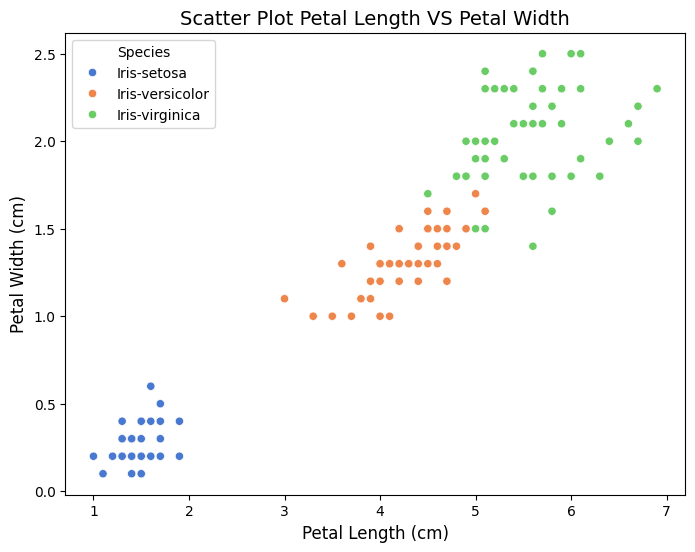

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette="muted")

plt.title("Scatter Plot Petal Length VS Petal Width", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)

plt.legend(title="Species")

plt.show()

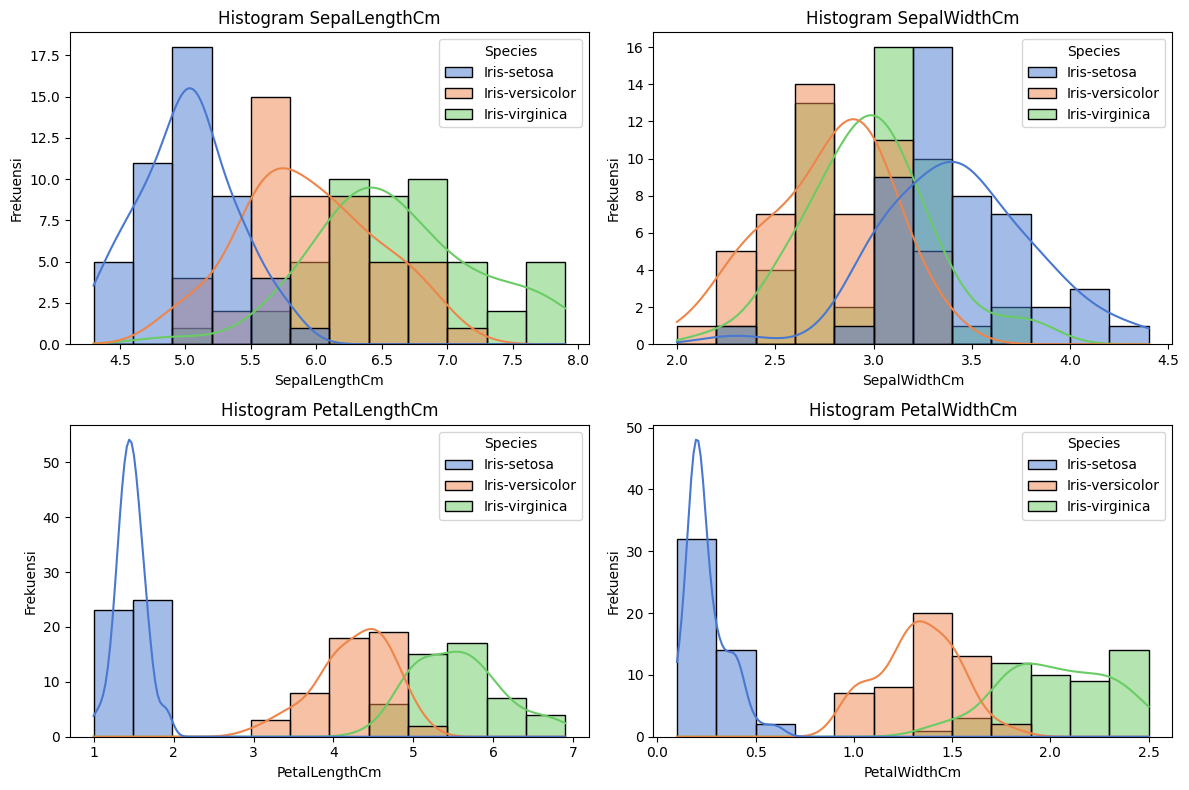

In [15]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.iloc[:, :-1].columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue="Species", kde=True, palette="muted", bins=12)
    plt.title(f"Histogram {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")

plt.tight_layout()

plt.show()

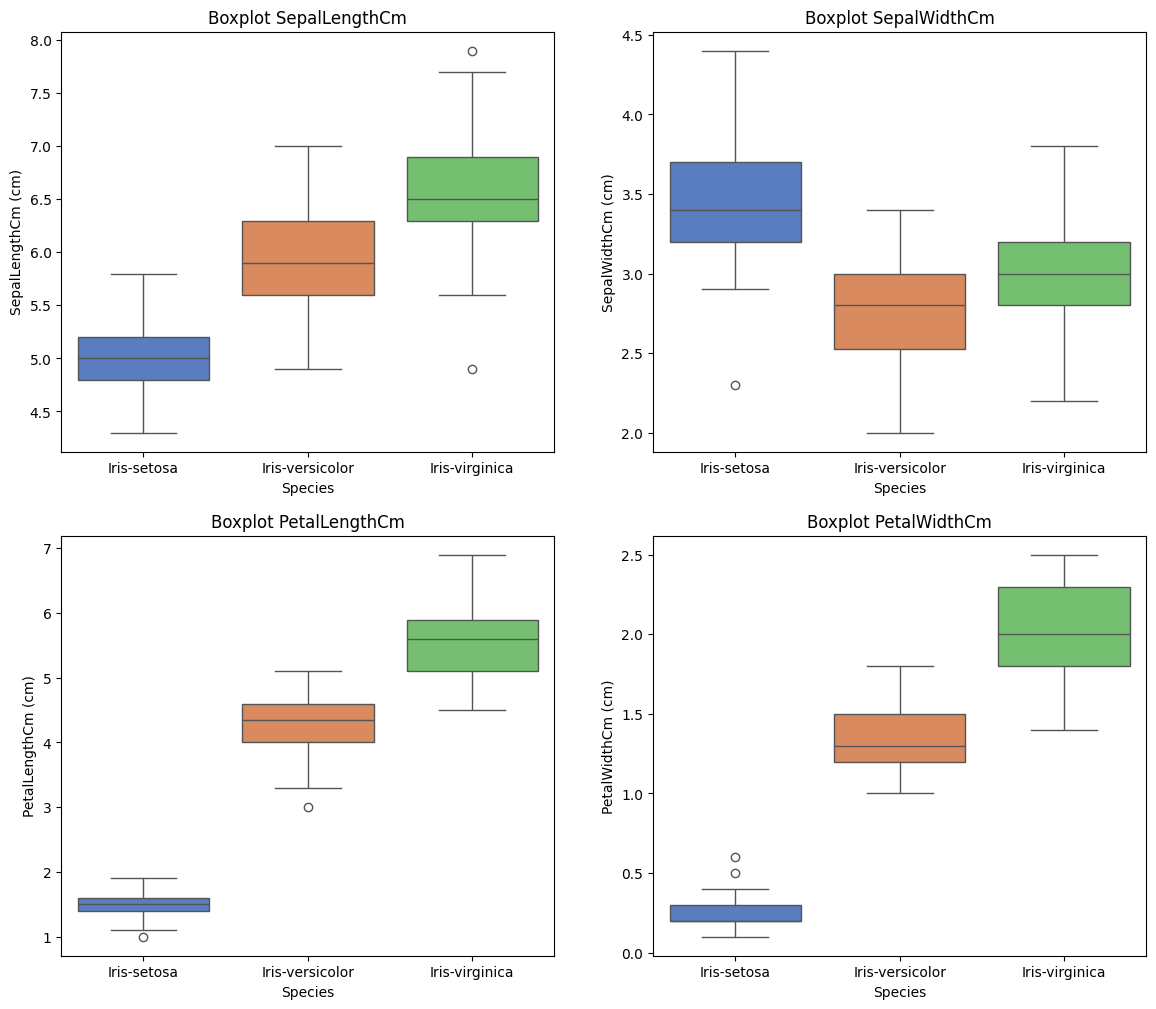

In [16]:
plt.figure(figsize=(14, 12))

features = df.iloc[:, :-1]

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="Species", y=feature, hue="Species", palette="muted")
    plt.title(f"Boxplot {feature}")
    plt.xlabel("Species")
    plt.ylabel(f"{feature} (cm)")

# **Decision Tree**

In [ ]:
class TreeNode():
    def __init__(self, data, feature_idx, feature_val, prediction_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None
        
    def node_def(self) -> str:
        if (self.left or self.right):
            return f"NODE | Information Gain = {self.information_gain} | Split IF X[{self.feature_idx}] < {self.feature_val} THEN left O/W right"
        else:
            unique_values, value_counts = np.unique(self.data[:,-1], return_counts=True)
            output = ", ".join([f"{value}->{count}" for value, count in zip(unique_values, value_counts)])
            return f"LEAF | Label Counts = {output} | Pred Probs = {self.prediction_probs}"
        

### *Membuat class DecisionTree*

In [29]:
class DecisionTree():
    def __init__(self, max_depth=4, min_samples_leaf=1, min_information_gain=0.0, numb_of_feature_splitting=None, amoun_of_say=None) -> None:
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.numb_of_feature_splitting = numb_of_feature_splitting
        self.amoun_of_say = amoun_of_say

    def _entropy(self, class_probabilities: list) -> float:
        return sum([-p * np.log2(p) for p in class_probabilities if p > 0])

    def _class_probabilities(self, labels: np.array) -> list:
        unique, counts = np.unique(labels, return_counts=True)
        return counts / counts.sum()

    def _data_entropy(self, labels: list) -> float:
        return self._entropy(self._class_probabilities(labels))

    def _partition_entropy(self, subsets: list) -> float:
        total_count = sum([len(subset) for subset in subsets])
        return sum([self._data_entropy(subset) * (len(subset) / total_count) for subset in subsets])

    def _split(self, data: np.array, feature_idx: int, feature_val: float) -> tuple:
        mask_below_threshold = data[:, feature_idx] < feature_val
        group1 = data[mask_below_threshold]
        group2 = data[~mask_below_threshold]

        return group1, group2

    def _select_feature_to_use(self, data: np.array) -> list:
        feature_idx = list(range(data.shape[1]-1))

        if self.numb_of_feature_splitting == "sqrt":
            feature_idx_to_use = np.random.choice(
                feature_idx, size=int(np.sqrt(len(feature_idx))))
        elif self.numb_of_feature_splitting == "log":
            feature_idx_to_use = np.random.choice(
                feature_idx, size=int(np.log2(len(feature_idx))))
        else:
            feature_idx_to_use = feature_idx

        return feature_idx_to_use

    def _find_best_split(self, data: np.array) -> tuple:
        min_part_entropy = 1e9
        feature_idx_to_use = self._select_feature_to_use(data)

        for idx in feature_idx_to_use:
            feature_vals = np.percentile(
                data[:, idx], q=np.arange(25, 100, 25))
            for feature_val in feature_vals:
                g1, g2 = self._split(data, idx, feature_val)
                part_entropy = self._partition_entropy([g1[:, -1], g2[:, -1]])
                if part_entropy < min_part_entropy:
                    min_part_entropy = part_entropy
                    min_entropy_feature_idx = idx
                    min_entropy_feature_val = feature_val
                    g1_min, g2_min = g1, g2

        return g1_min, g2_min, min_entropy_feature_idx, min_entropy_feature_val, min_part_entropy

    def _find_labels_probs(self, data: np.array) -> np.array:
        labels_as_integers = data[:, -1].astype(int)
        unique, counts = np.unique(labels_as_integers, return_counts=True)
        label_probability = np.zeros(len(self.labels_in_train), dtype=float)

        label_probability[unique] = counts / counts.sum()
        return label_probability

    def _create_tree(self, data: np.array, current_depth: int) -> TreeNode:
        if current_depth > self.max_depth:
            return None

        split_1_data, split_2_data, split_feature_idx, split_feature_vals, split_entropy = self._find_best_split(
            data)

        labels_probabilities = self._find_labels_probs(data)
        
        node_entropy = self._entropy(labels_probabilities)
        information_gain = node_entropy - split_entropy

        node = TreeNode(data, split_feature_idx, split_feature_vals,
                        labels_probabilities, information_gain)

        if self.min_samples_leaf > split_1_data.shape[0] or self.min_samples_leaf > split_2_data.shape[0]:
            return node
        elif information_gain < self.min_information_gain:
            return node

        current_depth += 1
        node.left = self._create_tree(split_1_data, current_depth)
        node.right = self._create_tree(split_2_data, current_depth)
        
        return node

    def _predict_one_sample(self, X: np.array) -> np.array:
        node = self.tree

        while node:
            pred_probs = node.prediction_probs
            if X[node.feature_idx] < node.feature_val:
                node = node.left
            else:
                node = node.right

        return pred_probs

    def train(self, X_train: np.array, Y_train: np.array) -> None:
        self.labels_in_train = np.unique(Y_train)
        train_data = np.concatenate(
            (X_train, np.reshape(Y_train, (-1, 1))), axis=1)

        self.tree = self._create_tree(data=train_data, current_depth=0)

        self.feature_importances = dict.fromkeys(range(X_train.shape[1]), 0)
        self._calculate_feature_importance(self.tree)
        self.feature_importances = {k: v / total for total in (sum(
            self.feature_importances.values()),) for k, v in self.feature_importances.items()}

    def predict_proba(self, X_set: np.array) -> np.array:
        pred_probs = np.apply_along_axis(self._predict_one_sample, 1, X_set)
        return pred_probs

    def predict(self, X_set: np.array) -> np.array:
        pred_probs = self.predict_proba(X_set)
        preds = np.argmax(pred_probs, axis=1)

        return preds

    def _print_recursive(self, node: TreeNode, level=0) -> None:
        if node != None:
            self._print_recursive(node.left, level + 1)
            print('    ' * 4 * level + '-> ' + node.node_def())
            self._print_recursive(node.right, level + 1)

    def print_tree(self) -> None:
        self._print_recursive(node=self.tree)

    def _calculate_feature_importance(self, node):
        if node != None:
            self.feature_importances[node.feature_idx] += node.feature_importance
            self._calculate_feature_importance(node.left)
            self._calculate_feature_importance(node.right)


### *Membuat train test split*

In [19]:
def train_test_split(X,y, random_state=42, test_size=0.2):
    n_samples = X.shape[0]
    
    np.random.seed(random_state)
    
    shuffled_indices = np.random.permutation(np.arange(n_samples))
    
    test_size = int(n_samples * test_size)
    
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [20]:
# Buat kamus untuk memetakan kategori ke angka
class_mapping = {label: idx for idx, label in enumerate(df['Species'].unique())}

# Terapkan pemetaan ke kolom 'Species'
df['Species'] = df['Species'].map(class_mapping)

In [21]:
X = df.drop('Species', axis=1).values
# y = df['Species'].values.reshape(-1,1)
y = df['Species'].values

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Train Shape :", X_train.shape)
print("Test Shape : ", X_test.shape)

Train Shape : (118, 4)
Test Shape :  (29, 4)


In [23]:
tree = DecisionTree(max_depth=4, min_samples_leaf=1)
tree.train(X_train,y_train)


In [24]:
tree.print_tree()

                                                                -> LEAF | Label Counts = 0.0->2 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.475 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->6 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.8 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->5 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 5.0 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->24 | Pred Probs = [1. 0. 0.]
                -> NODE | Information Gain = 0.9959386076315954 | Split IF X[3] < 1.0 THEN left O/W right
                                                  

In [25]:
# Let's see the Train performance
train_preds = tree.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train Size", len(y_train))
print("True preds", sum(train_preds == y_train))
print("Train Accuracy", sum(train_preds == y_train) / len(y_train))

TRAIN PERFORMANCE
Train Size 118
True preds 114
Train Accuracy 0.9661016949152542


In [26]:
# Let's see the Test performance
test_preds = tree.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test Size", len(y_test))
print("True preds", sum(test_preds == y_test))
print("Test Accuracy", sum(test_preds == y_test) / len(y_test))

TEST PERFORMANCE
Test Size 29
True preds 28
Test Accuracy 0.9655172413793104


Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  1  7]]


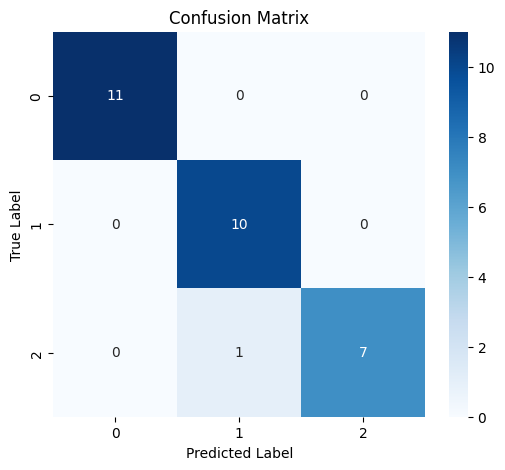

In [27]:

def confusion_matrix(y_true, y_pred, labels=None):
    """
    Membuat confusion matrix dari label sebenarnya dan prediksi.
    :param y_true: List atau array label sebenarnya
    :param y_pred: List atau array label prediksi
    :param labels: List dari semua label unik (opsional)
    :return: Confusion matrix sebagai numpy array
    """
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: idx for idx, label in enumerate(labels)}
    
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1
    
    return matrix, labels

def plot_confusion_matrix(cm, labels):
    """
    Memvisualisasikan confusion matrix.
    :param cm: Confusion matrix dalam bentuk numpy array
    :param labels: Label kelas
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

cm, labels = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:")
print(cm)
plot_confusion_matrix(cm, labels)

Confusion Matrix:
[[37  0  0]
 [ 0 40  0]
 [ 0  4 37]]


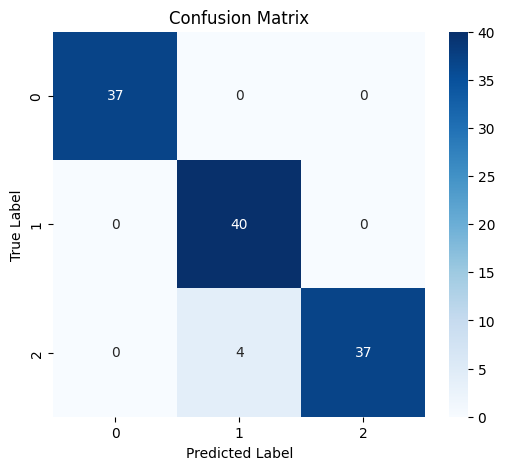

In [28]:
cm, labels = confusion_matrix(y_train, train_preds)
print("Confusion Matrix:")
print(cm)
plot_confusion_matrix(cm, labels)